In [2]:
#imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [3]:
df = pd.read_csv('Cleaned_BA_reviews.csv', index_col=0)
df

reviews  stars        date  \
0     Not Verified |  The customer service is one of...    5.0  2024-08-18   
1     Not Verified | Before my flight, I was forced ...    2.0  2024-08-15   
2     ✅ Trip Verified |   British Airways at its bes...    1.0  2024-08-12   
3     ✅ Trip Verified | An excellent flight! Despite...    8.0  2024-08-12   
4     ✅ Trip Verified | I recently traveled with Bri...    8.0  2024-08-11   
...                                                 ...    ...         ...   
3829  YYZ to LHR - July 2012 - I flew overnight in p...    9.0  2012-08-29   
3830  LHR to HAM. Purser addresses all club passenge...    5.0  2012-08-28   
3831  My son who had worked for British Airways urge...    8.0  2011-10-12   
3832  London City-New York JFK via Shannon on A318 b...    2.0  2011-10-11   
3833  SIN-LHR BA12 B747-436 First Class. Old aircraf...    7.0  2011-10-09   

             country  verified  \
0      United States     False   
1     United Kingdom     False   
2     United Kingdom      True   
3            Lebanon      True   
4      United States      True   
...              ...       ...   
3829          Canada     False   
3830  United Kingdom     False   
3831  United Kingdom     False   
3832   United States     False   
3833  United Kingdom     False   

                                                 corpus  
0     verified customer service one worst ever seen ...  
1     verified flight forced ground staff check new ...  
2     british airway best outstanding service flight...  
3     excellent flight despite hour flight configure...  
4     recently traveled british airway mixed experie...  
...                                                 ...  
3829  yyz lhr july flew overnight premium economy ch...  
3830  lhr ham purser address club passenger name boa...  
3831  son worked british airway urged fly british ai...  
3832  london city new york jfk via shannon really ni...  
3833  sin lhr ba b first class old aircraft seat pri...  

[3834 rows x 6 columns]

In [4]:
df = df.reset_index(drop = True)
df

reviews  stars        date  \
0     Not Verified |  The customer service is one of...    5.0  2024-08-18   
1     Not Verified | Before my flight, I was forced ...    2.0  2024-08-15   
2     ✅ Trip Verified |   British Airways at its bes...    1.0  2024-08-12   
3     ✅ Trip Verified | An excellent flight! Despite...    8.0  2024-08-12   
4     ✅ Trip Verified | I recently traveled with Bri...    8.0  2024-08-11   
...                                                 ...    ...         ...   
3829  YYZ to LHR - July 2012 - I flew overnight in p...    9.0  2012-08-29   
3830  LHR to HAM. Purser addresses all club passenge...    5.0  2012-08-28   
3831  My son who had worked for British Airways urge...    8.0  2011-10-12   
3832  London City-New York JFK via Shannon on A318 b...    2.0  2011-10-11   
3833  SIN-LHR BA12 B747-436 First Class. Old aircraf...    7.0  2011-10-09   

             country  verified  \
0      United States     False   
1     United Kingdom     False   
2     United Kingdom      True   
3            Lebanon      True   
4      United States      True   
...              ...       ...   
3829          Canada     False   
3830  United Kingdom     False   
3831  United Kingdom     False   
3832   United States     False   
3833  United Kingdom     False   

                                                 corpus  
0     verified customer service one worst ever seen ...  
1     verified flight forced ground staff check new ...  
2     british airway best outstanding service flight...  
3     excellent flight despite hour flight configure...  
4     recently traveled british airway mixed experie...  
...                                                 ...  
3829  yyz lhr july flew overnight premium economy ch...  
3830  lhr ham purser address club passenger name boa...  
3831  son worked british airway urged fly british ai...  
3832  london city new york jfk via shannon really ni...  
3833  sin lhr ba b first class old aircraft seat pri...  

[3834 rows x 6 columns]

In [5]:
df.dtypes

reviews      object
stars       float64
date         object
country      object
verified       bool
corpus       object
dtype: object

In [6]:
df.head()

reviews  stars        date  \
0  Not Verified |  The customer service is one of...    5.0  2024-08-18   
1  Not Verified | Before my flight, I was forced ...    2.0  2024-08-15   
2  ✅ Trip Verified |   British Airways at its bes...    1.0  2024-08-12   
3  ✅ Trip Verified | An excellent flight! Despite...    8.0  2024-08-12   
4  ✅ Trip Verified | I recently traveled with Bri...    8.0  2024-08-11   

          country  verified                                             corpus  
0   United States     False  verified customer service one worst ever seen ...  
1  United Kingdom     False  verified flight forced ground staff check new ...  
2  United Kingdom      True  british airway best outstanding service flight...  
3         Lebanon      True  excellent flight despite hour flight configure...  
4   United States      True  recently traveled british airway mixed experie...

In [7]:
df.stars.mean()

4.693792383933229

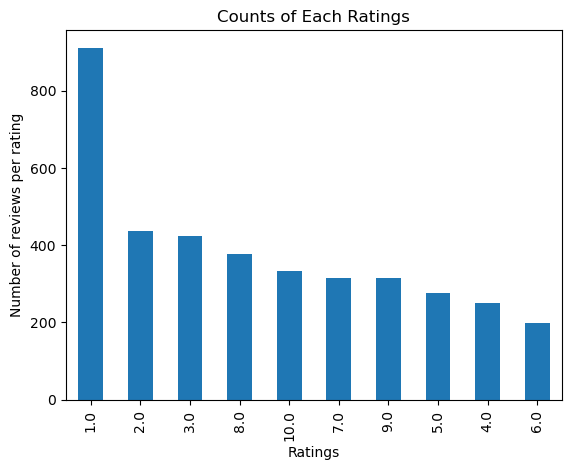

In [8]:
df.stars.value_counts().plot(kind='bar')
plt.title('Counts of Each Ratings')
plt.xlabel("Ratings")
plt.ylabel("Number of reviews per rating");

In [26]:
df_ratings = pd.DataFrame(df.stars.value_counts())
df_ratings = df_ratings.reset_index()
df_ratings.columns = ['stars', 'count']
pct_values = (df_ratings['count'].values/df_ratings['count'].values.sum()*100).tolist()
pct_values = [round(x, 2) for x in pct_values]
df_ratings['percentage'] = pct_values
df_ratings

stars  count  percentage
0    1.0    911       23.76
1    2.0    437       11.40
2    3.0    423       11.03
3    8.0    377        9.83
4   10.0    332        8.66
5    7.0    316        8.24
6    9.0    314        8.19
7    5.0    276        7.20
8    4.0    250        6.52
9    6.0    198        5.16

In [27]:
df_ratings.rename(columns={'stars':'stars', 'count':'total_count'}, inplace=True)

In [28]:
df_ratings

stars  total_count  percentage
0    1.0          911       23.76
1    2.0          437       11.40
2    3.0          423       11.03
3    8.0          377        9.83
4   10.0          332        8.66
5    7.0          316        8.24
6    9.0          314        8.19
7    5.0          276        7.20
8    4.0          250        6.52
9    6.0          198        5.16

In [25]:
df_ratings.sort_values(by='stars', inplace=True)
df_ratings.reset_index(drop=True, inplace=True)
df_ratings

stars  total_count  percentage
0    1.0          911       23.76
1    2.0          437       11.40
2    3.0          423       11.03
3    4.0          250        6.52
4    5.0          276        7.20
5    6.0          198        5.16
6    7.0          316        8.24
7    8.0          377        9.83
8    9.0          314        8.19
9   10.0          332        8.66

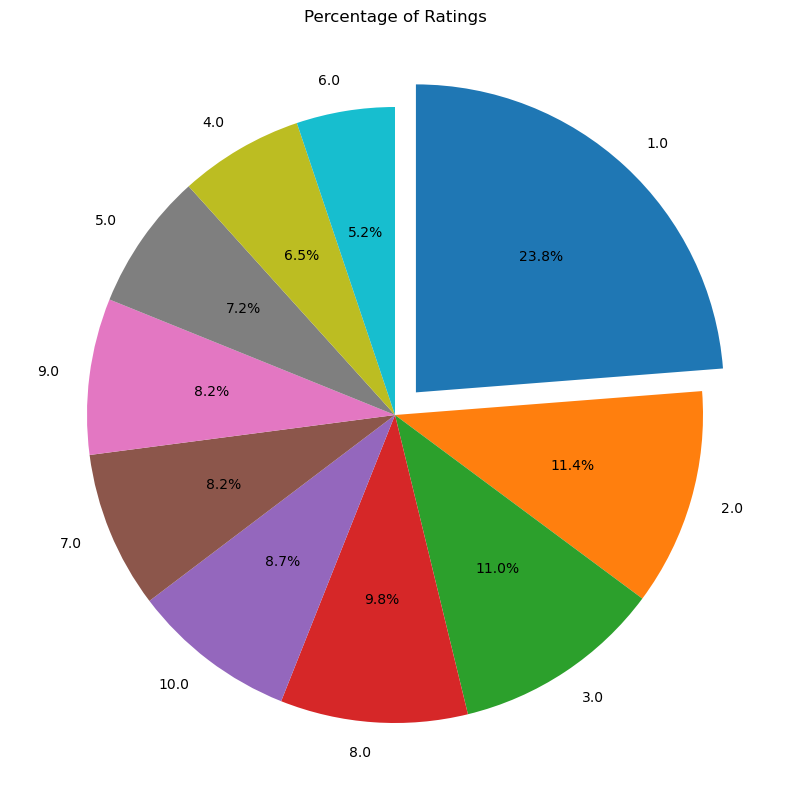

In [29]:
plt.figure(figsize=(10,10))

plt.title("Percentage of Ratings");
plt.pie(df_ratings.percentage, labels = df_ratings.stars, autopct='%1.1f%%', explode=[0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0], shadow=False, counterclock=False, startangle=90);

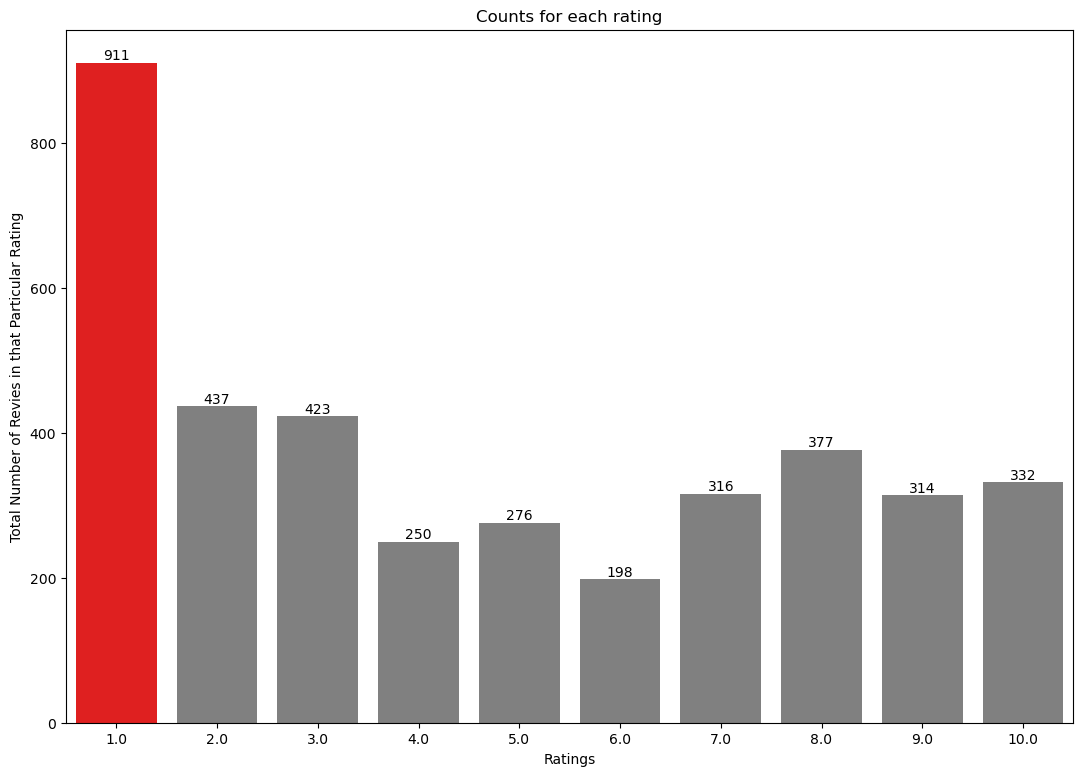

In [30]:
clrs = ['Red' if (x == max(df_ratings.total_count)) else 'grey' for x in df_ratings.total_count]

fig = plt.figure(figsize=(13,9))
ax_rating = sns.barplot(x=df_ratings.stars, y=df_ratings.total_count, data=df_ratings, errwidth=0, palette=clrs)

for container in ax_rating.containers:
  ax_rating.bar_label(container)

ax_rating.set_xlabel("Ratings")
ax_rating.set_ylabel("Total Number of Revies in that Particular Rating")
ax_rating.set_title("Counts for each rating");

In [14]:
df.date = pd.to_datetime(df.date)

In [15]:
df_year = pd.DataFrame(df.date.dt.year.value_counts())
df_year.reset_index(inplace=True)
df_year.columns = ['year', 'count']
df_year.sort_values(by='year', inplace=True)
percent = (df_year['count'].values/df_year['count'].values.sum()*100).tolist()
percent = [round(x, 2) for x in percent]
df_year['percent'] = percent
df_year.reset_index(drop=True, inplace=True)
df_year

year  count  percent
0   2011      3     0.08
1   2012     12     0.31
2   2014    463    12.08
3   2015    735    19.17
4   2016    570    14.87
5   2017    572    14.92
6   2018    324     8.45
7   2019    356     9.29
8   2020    104     2.71
9   2021     87     2.27
10  2022    213     5.56
11  2023    280     7.30
12  2024    115     3.00

In [16]:
df_year.rename(columns={'year':'year', 'count':'total_count', 'percent':'percentage'}, inplace=True)
df_year

year  total_count  percentage
0   2011            3        0.08
1   2012           12        0.31
2   2014          463       12.08
3   2015          735       19.17
4   2016          570       14.87
5   2017          572       14.92
6   2018          324        8.45
7   2019          356        9.29
8   2020          104        2.71
9   2021           87        2.27
10  2022          213        5.56
11  2023          280        7.30
12  2024          115        3.00

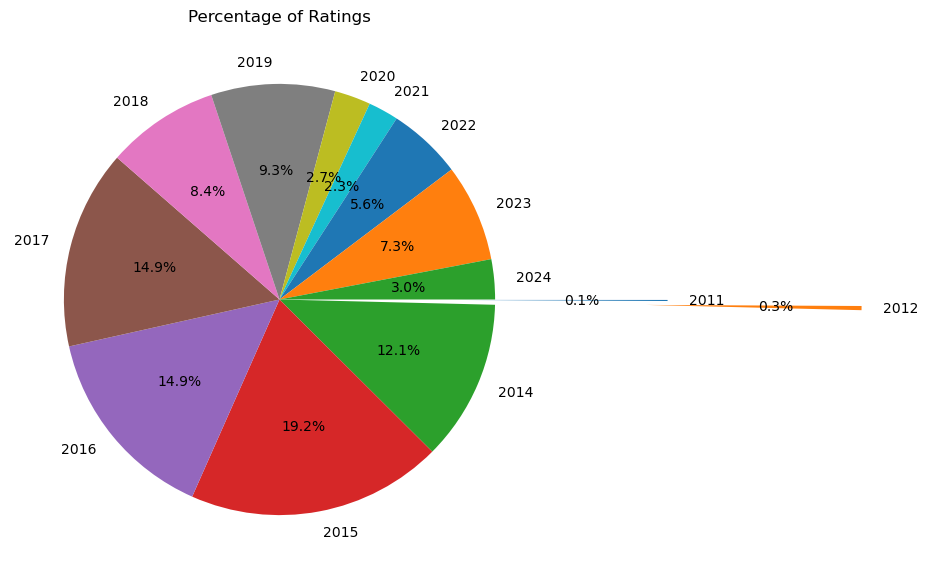

In [17]:
plt.figure(figsize=(7,7))

plt.title("Percentage of Ratings");
plt.pie(df_year.percentage, labels = df_year.year, autopct='%1.1f%%', explode=[0.8,1.7,0,0,0,0,0,0,0,0,0,0,0], shadow=False, counterclock=False, startangle=360);

In [18]:
df_year.dtypes

year             int32
total_count      int64
percentage     float64
dtype: object

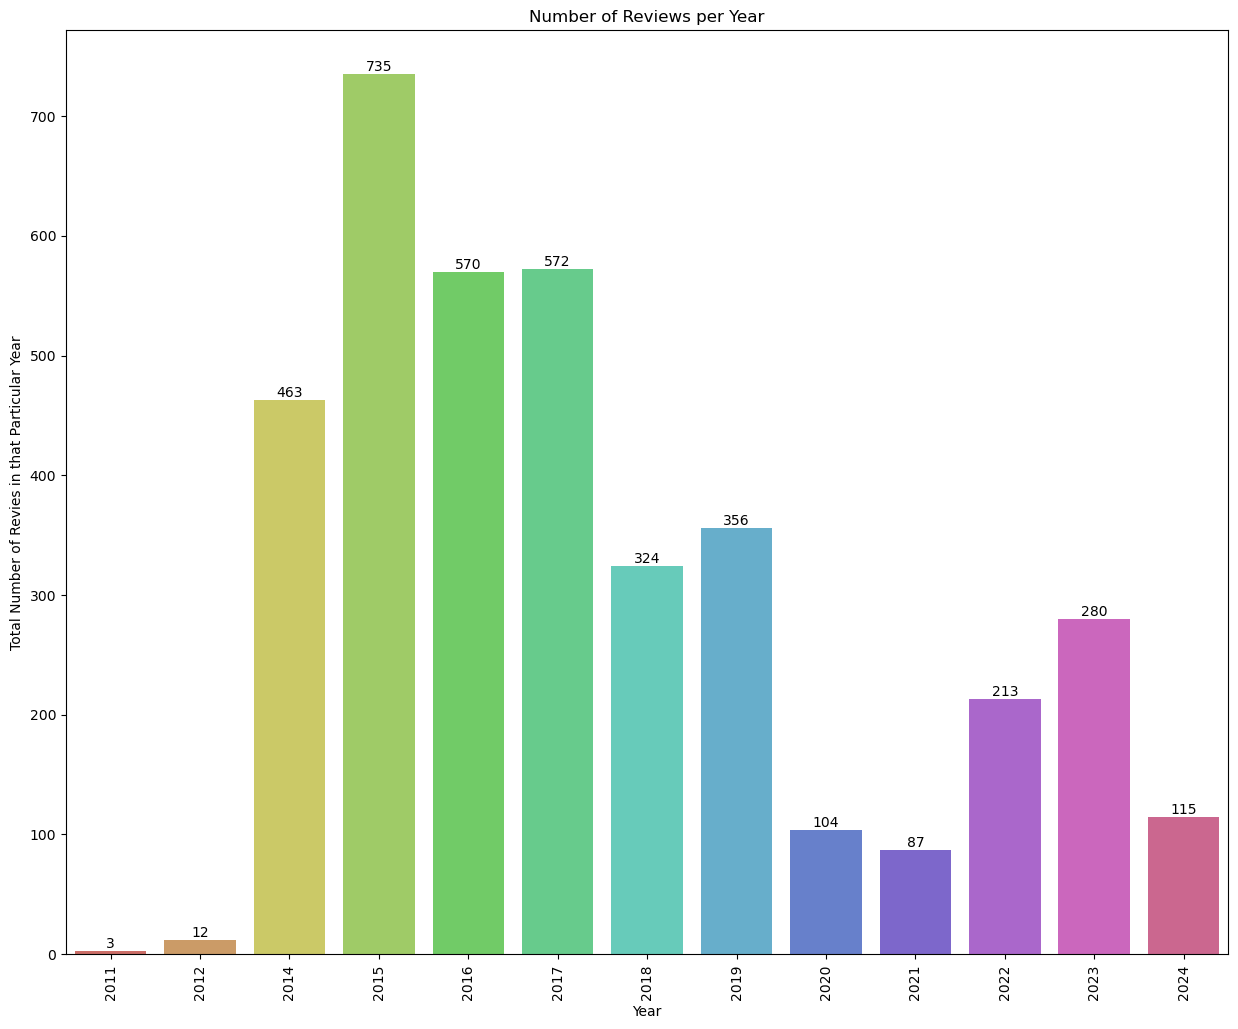

In [19]:
df_year['year'] = df_year['year'].astype('str')
coloring = sns.color_palette("hls", len(df_year))

fig = plt.figure(figsize=(15,12))
ax2 = sns.barplot(x=df_year.year, y=df_year.total_count, data=df_year, errwidth=0, palette=coloring)

for container in ax2.containers:
  ax2.bar_label(container)

plt.xticks(rotation=90)
ax2.set_xlabel("Year")
ax2.set_ylabel("Total Number of Revies in that Particular Year")
ax2.set_title("Number of Reviews per Year");

In [20]:
print(f"British Airways received reviews from {len(df.country.unique())} unique countries")

British Airways received reviews from 73 unique countries


In [21]:
df_country_review = pd.DataFrame(df.country.value_counts())
df_country_review

count
country                     
United Kingdom          2400
United States            439
Australia                163
Canada                   123
Germany                   67
...                      ...
Costa Rica                 1
Cayman Islands             1
Saint Kitts and Nevis      1
Vietnam                    1
Oman                       1

[73 rows x 1 columns]

In [22]:
df_country_review.reset_index(inplace=True)

In [23]:
df_country_review.columns = ['country', 'total_count']

In [24]:
df_country_review

country  total_count
0          United Kingdom         2400
1           United States          439
2               Australia          163
3                  Canada          123
4                 Germany           67
..                    ...          ...
68             Costa Rica            1
69         Cayman Islands            1
70  Saint Kitts and Nevis            1
71                Vietnam            1
72                   Oman            1

[73 rows x 2 columns]

In [25]:
df_country_review = df_country_review.head(5)

In [26]:
df_country_review

country  total_count
0  United Kingdom         2400
1   United States          439
2       Australia          163
3          Canada          123
4         Germany           67

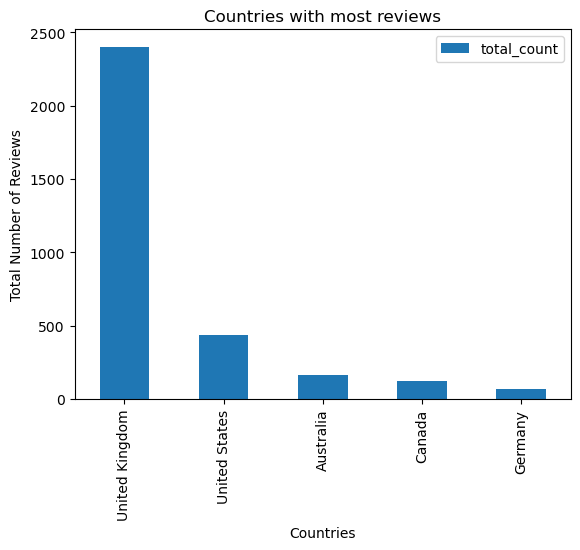

In [27]:
df_country_review.plot(kind="bar", x='country')
plt.title("Countries with most reviews")
plt.xlabel("Countries")
plt.ylabel("Total Number of Reviews");

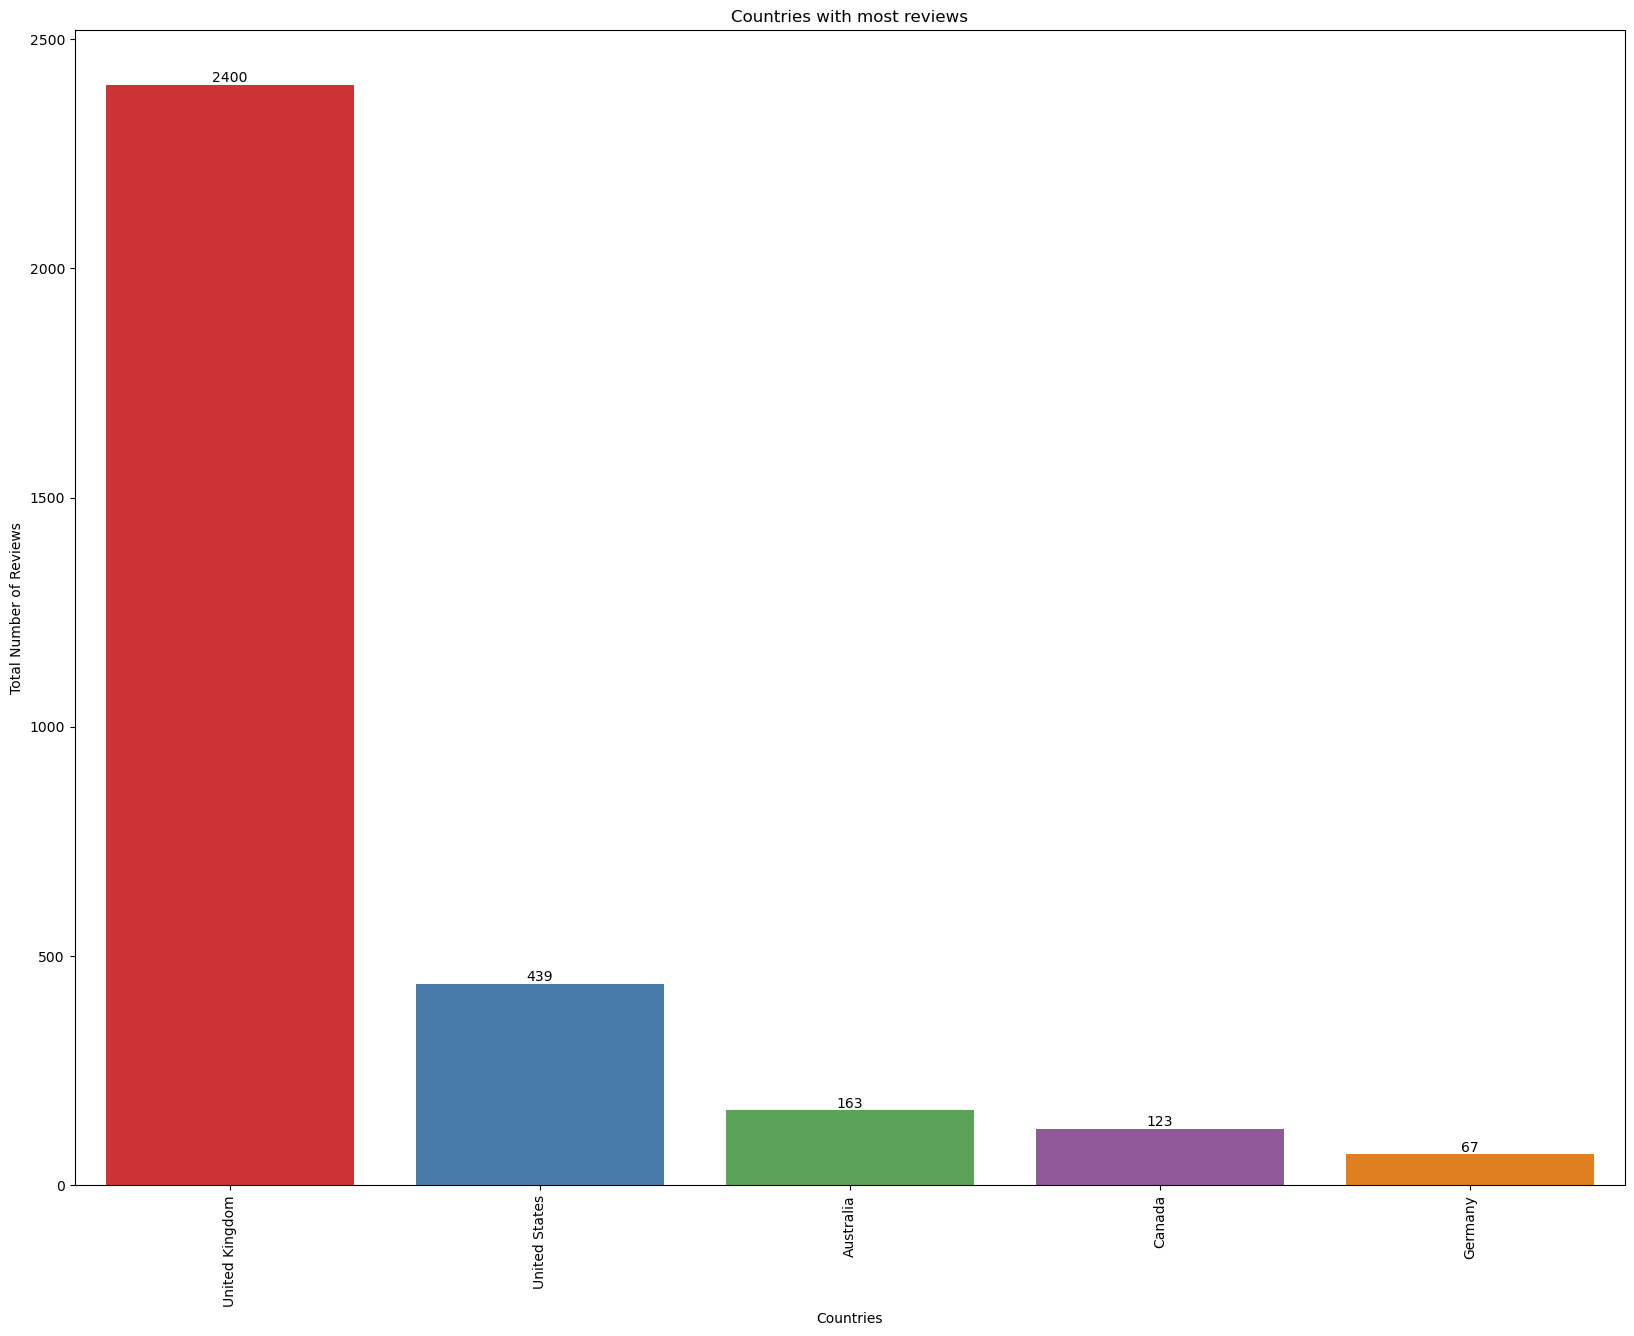

In [28]:
fig = plt.figure(figsize=(20, 15))
ax = sns.barplot(x=df_country_review.country, y=df_country_review.total_count, data=df_country_review, errwidth=0, palette='Set1')

for container in ax.containers:
  ax.bar_label(container)

ax.set_xlabel("Countries")
ax.set_ylabel("Total Number of Reviews")
ax.set_title("Countries with most reviews")
plt.xticks(rotation=90);

In [29]:
df

reviews  stars       date  \
0     Not Verified |  The customer service is one of...    5.0 2024-08-18   
1     Not Verified | Before my flight, I was forced ...    2.0 2024-08-15   
2     ✅ Trip Verified |   British Airways at its bes...    1.0 2024-08-12   
3     ✅ Trip Verified | An excellent flight! Despite...    8.0 2024-08-12   
4     ✅ Trip Verified | I recently traveled with Bri...    8.0 2024-08-11   
...                                                 ...    ...        ...   
3829  YYZ to LHR - July 2012 - I flew overnight in p...    9.0 2012-08-29   
3830  LHR to HAM. Purser addresses all club passenge...    5.0 2012-08-28   
3831  My son who had worked for British Airways urge...    8.0 2011-10-12   
3832  London City-New York JFK via Shannon on A318 b...    2.0 2011-10-11   
3833  SIN-LHR BA12 B747-436 First Class. Old aircraf...    7.0 2011-10-09   

             country  verified  \
0      United States     False   
1     United Kingdom     False   
2     United Kingdom      True   
3            Lebanon      True   
4      United States      True   
...              ...       ...   
3829          Canada     False   
3830  United Kingdom     False   
3831  United Kingdom     False   
3832   United States     False   
3833  United Kingdom     False   

                                                 corpus  
0     verified customer service one worst ever seen ...  
1     verified flight forced ground staff check new ...  
2     british airway best outstanding service flight...  
3     excellent flight despite hour flight configure...  
4     recently traveled british airway mixed experie...  
...                                                 ...  
3829  yyz lhr july flew overnight premium economy ch...  
3830  lhr ham purser address club passenger name boa...  
3831  son worked british airway urged fly british ai...  
3832  london city new york jfk via shannon really ni...  
3833  sin lhr ba b first class old aircraft seat pri...  

[3834 rows x 6 columns]

In [30]:
df_country_rating = pd.DataFrame(df.groupby('country')['stars'].mean().sort_values(ascending=False)).reset_index()

In [31]:
df_country_rating

country      stars
0                 Oman  10.000000
1   Dominican Republic  10.000000
2              Ecuador   9.000000
3           Costa Rica   9.000000
4             Slovakia   7.333333
..                 ...        ...
68             Romania   1.000000
69           Indonesia   1.000000
70              Panama   1.000000
71              Jordan   1.000000
72             Senegal   1.000000

[73 rows x 2 columns]

In [32]:
avg_rating = df.groupby('country')['stars'].mean().sort_values(ascending=False)

In [33]:
df_country_rating=pd.DataFrame(avg_rating) # Create dataframe with country and avg_rating

In [34]:
df_country_rating

stars
country                      
Oman                10.000000
Dominican Republic  10.000000
Ecuador              9.000000
Costa Rica           9.000000
Slovakia             7.333333
...                       ...
Romania              1.000000
Indonesia            1.000000
Panama               1.000000
Jordan               1.000000
Senegal              1.000000

[73 rows x 1 columns]

In [35]:
df_country_rating.reset_index(inplace=True)
df_country_rating

country      stars
0                 Oman  10.000000
1   Dominican Republic  10.000000
2              Ecuador   9.000000
3           Costa Rica   9.000000
4             Slovakia   7.333333
..                 ...        ...
68             Romania   1.000000
69           Indonesia   1.000000
70              Panama   1.000000
71              Jordan   1.000000
72             Senegal   1.000000

[73 rows x 2 columns]

In [36]:
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)

In [37]:
df_country_rating

country  avg_rating
0                 Oman   10.000000
1   Dominican Republic   10.000000
2              Ecuador    9.000000
3           Costa Rica    9.000000
4             Slovakia    7.333333
..                 ...         ...
68             Romania    1.000000
69           Indonesia    1.000000
70              Panama    1.000000
71              Jordan    1.000000
72             Senegal    1.000000

[73 rows x 2 columns]

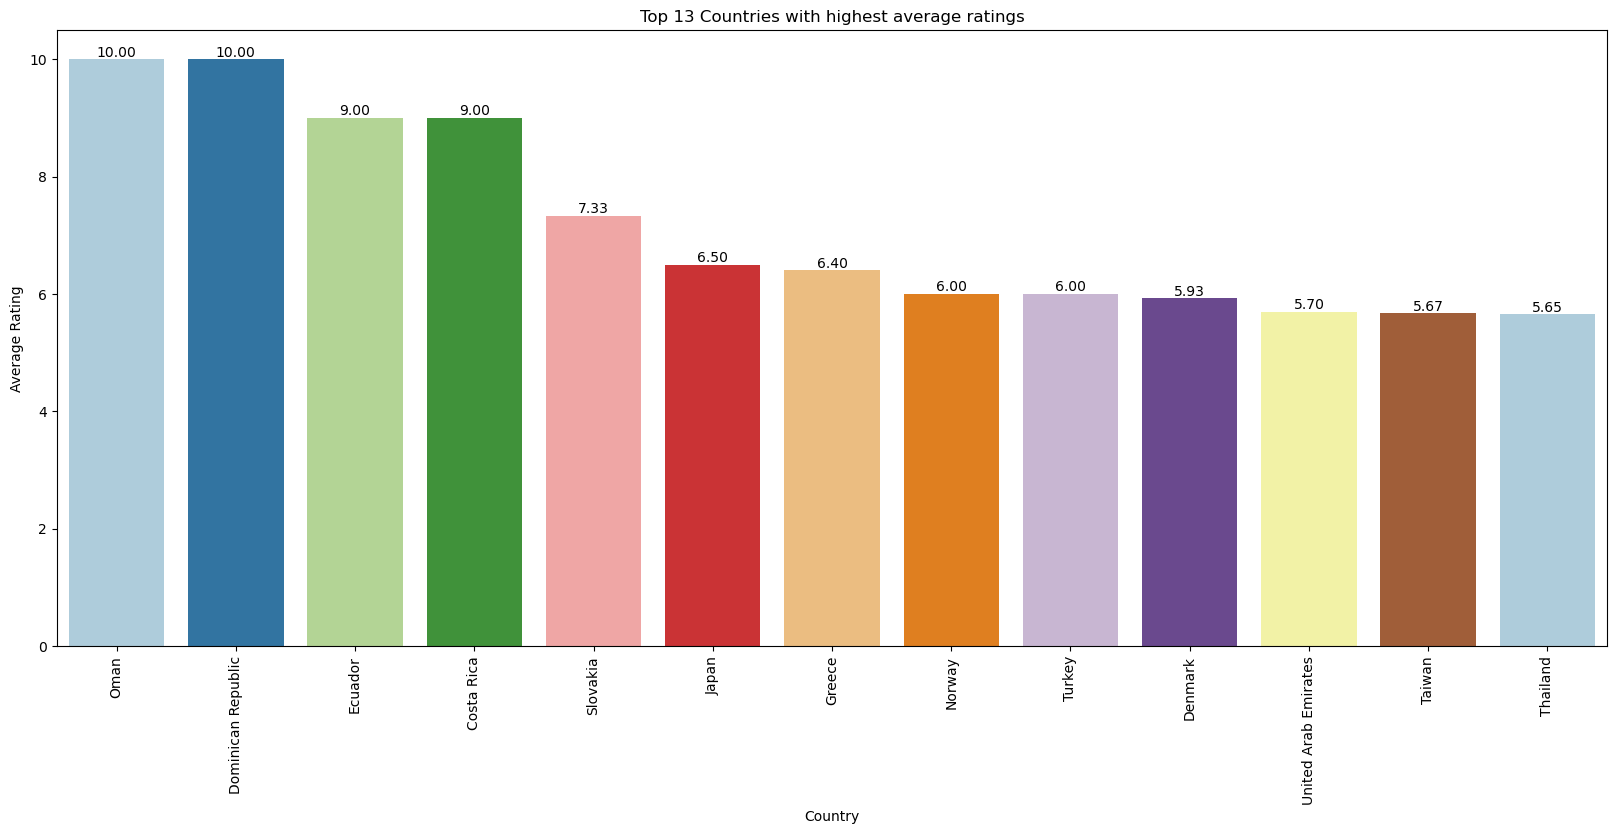

In [38]:
fig, ax = plt.subplots(figsize=(20, 8))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:13], palette='Paired')
for containers in ax1.containers:
  ax1.bar_label(containers, fmt='%.2f')

ax.set_xlabel("Country")
ax.set_ylabel("Average Rating")
ax.set_title("Top 13 Countries with highest average ratings")
plt.xticks(rotation=90);

/Users/rakibulhasan/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


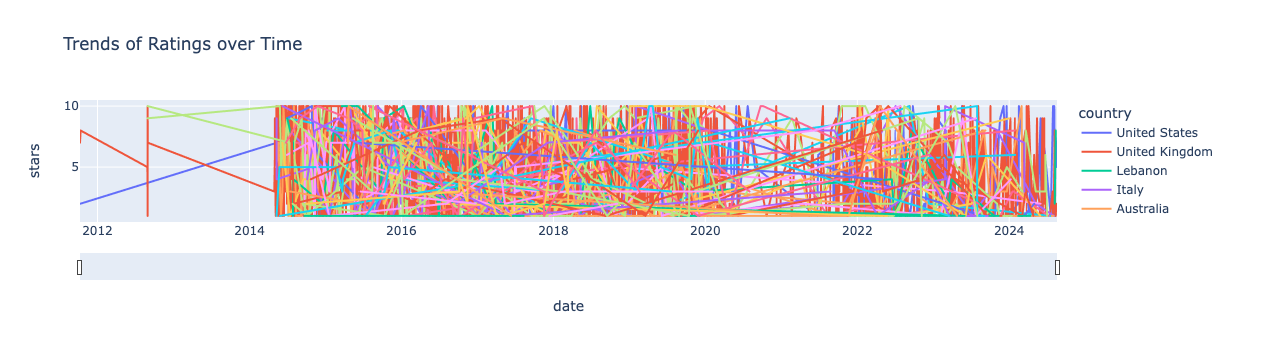

In [39]:
fig = px.line(df, x='date', y='stars', color='country', title='Trends of Ratings over Time')
fig.update_xaxes(rangeslider_visible=True)
fig.show();

In [40]:
!pip install nltk

In [41]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rakibulhasan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rakibulhasan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

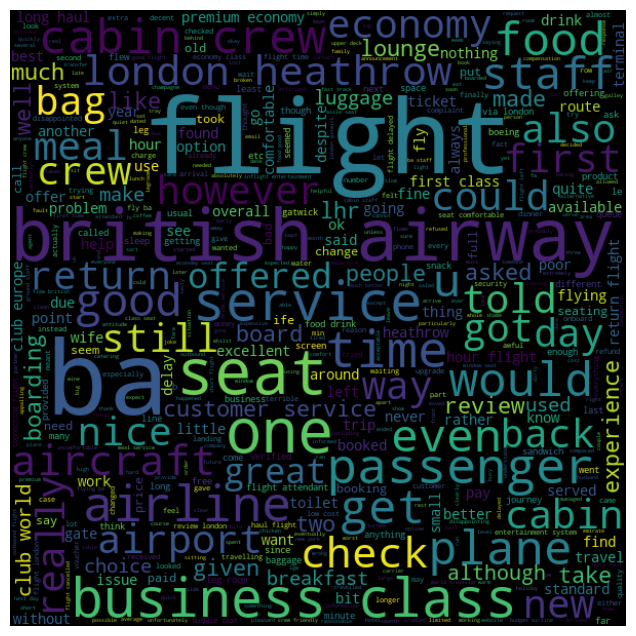

In [42]:
import nltk
from nltk.corpus import stopwords

reviews = " ".join(df.corpus)
plt.figure(figsize=(15,8))

stopwords = set(stopwords.words('english'))

wordcloud = WordCloud(
    height = 600,
    width=600,
    max_font_size=100,
    max_words=500,
    stopwords=stopwords).generate(reviews)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

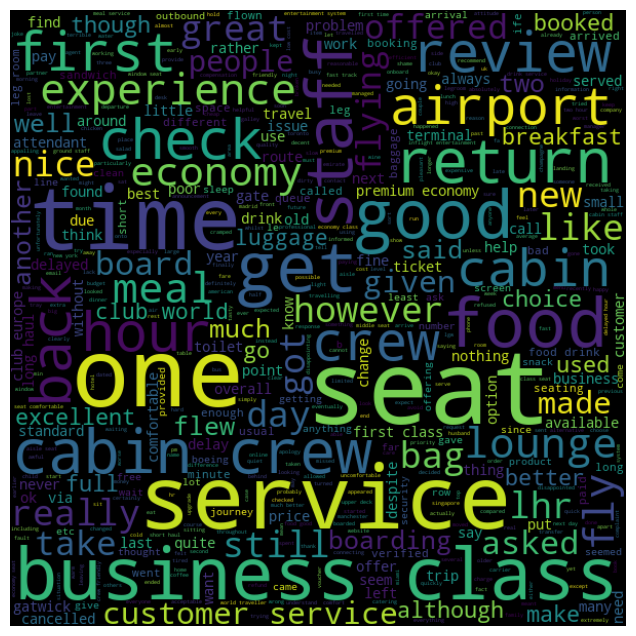

In [43]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(15,8))

stopwords = set(stopwords.words('english'))
# Use the update() method to add items to the set
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger", "london", "heathrow", "aircraft", "could", "u", "see", "even", "would", "bit", "wife", "way"])

wordcloud = WordCloud(
    height = 600,
    width=600,
    max_font_size=100,
    max_words=500,
    stopwords=stopwords).generate(reviews)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [44]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

words = reviews.split(" ")

stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', 'british', 'airway', 'airline', 'plane', 'told', 'also', 'passenger', 'london', 'heathrow', 'lhr', 'u'])

new_words = [word for word in words if word not in stopwords]

nlp_words = FreqDist(new_words).most_common(20)

all_fdist = pd.Series(dict(nlp_words))

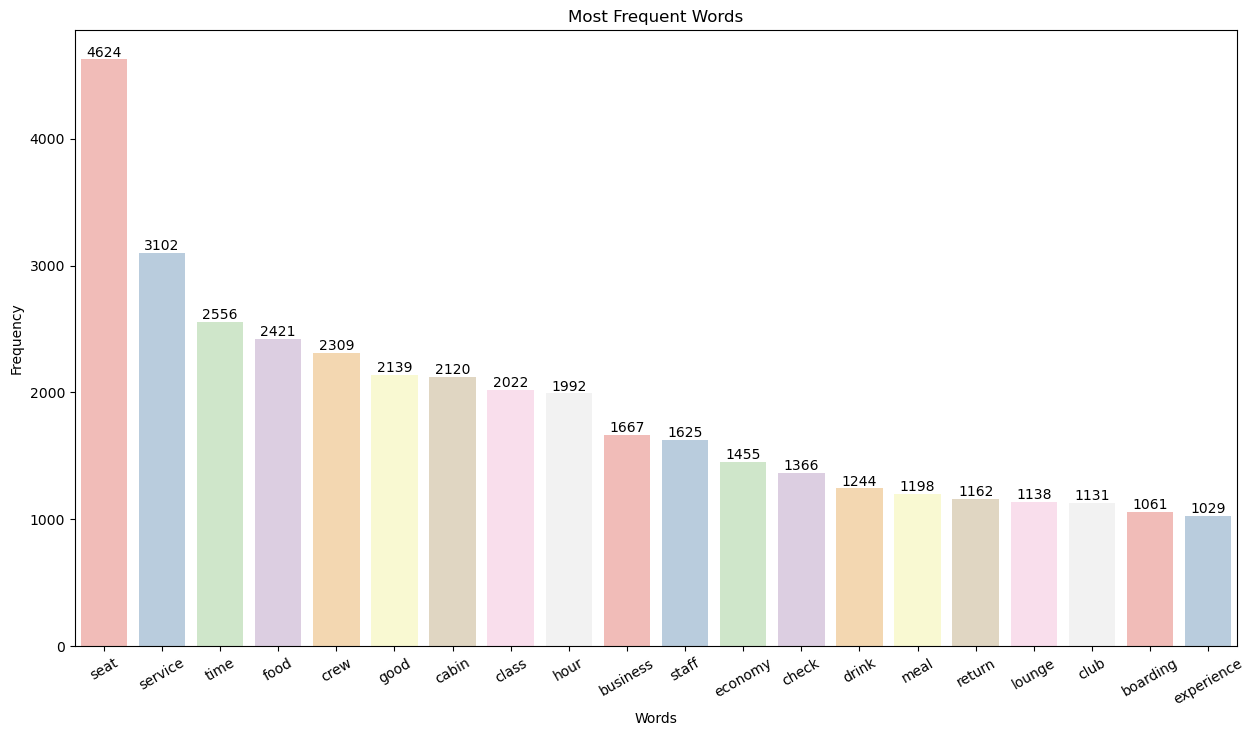

In [45]:
fig, ax = plt.subplots(figsize=(15, 8))

all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax, palette='Pastel1')
for container in all_plot.containers:
  all_plot.bar_label(container)

plt.xticks(rotation=30);
ax.set_xlabel("Words")
ax.set_ylabel("Frequency")
ax.set_title("Most Frequent Words");

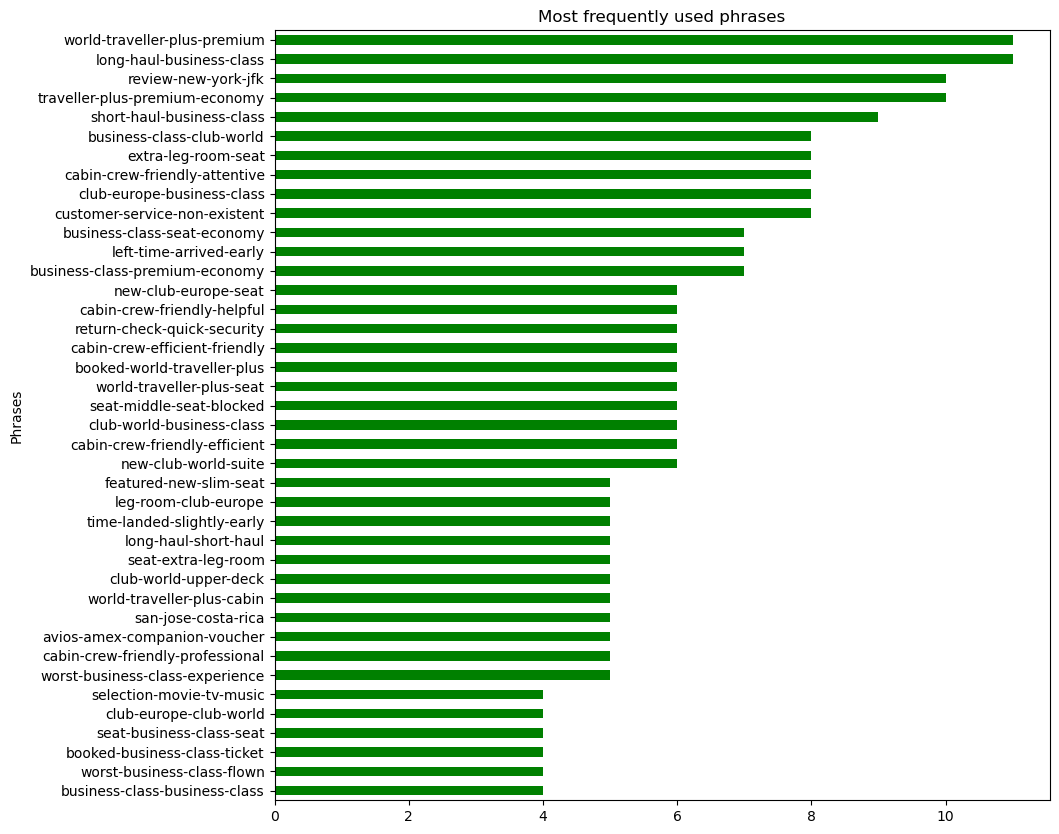

In [46]:
import nltk.collocations as cc
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words, no_of_ngrams):
  from nltk import ngrams

  ngrams = ngrams(new_words, no_of_ngrams)

  ngram_fd = FreqDist(ngrams).most_common(40)

  ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

  ngram_joined = {'-'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

  ngram_freqdist = pd.Series(ngram_joined)
  plt.figure(figsize=(10,10))
  ax = ngram_freqdist.plot(kind='barh', color='green')
  ax.set_ylabel("Phrases")
  ax.set_title("Most frequently used phrases")

  return ax

get_freq_dist(new_words, 4);

In [47]:
ratings_1_3 = df[df.stars.isin([1, 2, 3])]
ratings_4_6 = df[df.stars.isin([4, 5, 6])]
ratings_7_10 = df[df.stars.isin([7, 8, 9, 10])]

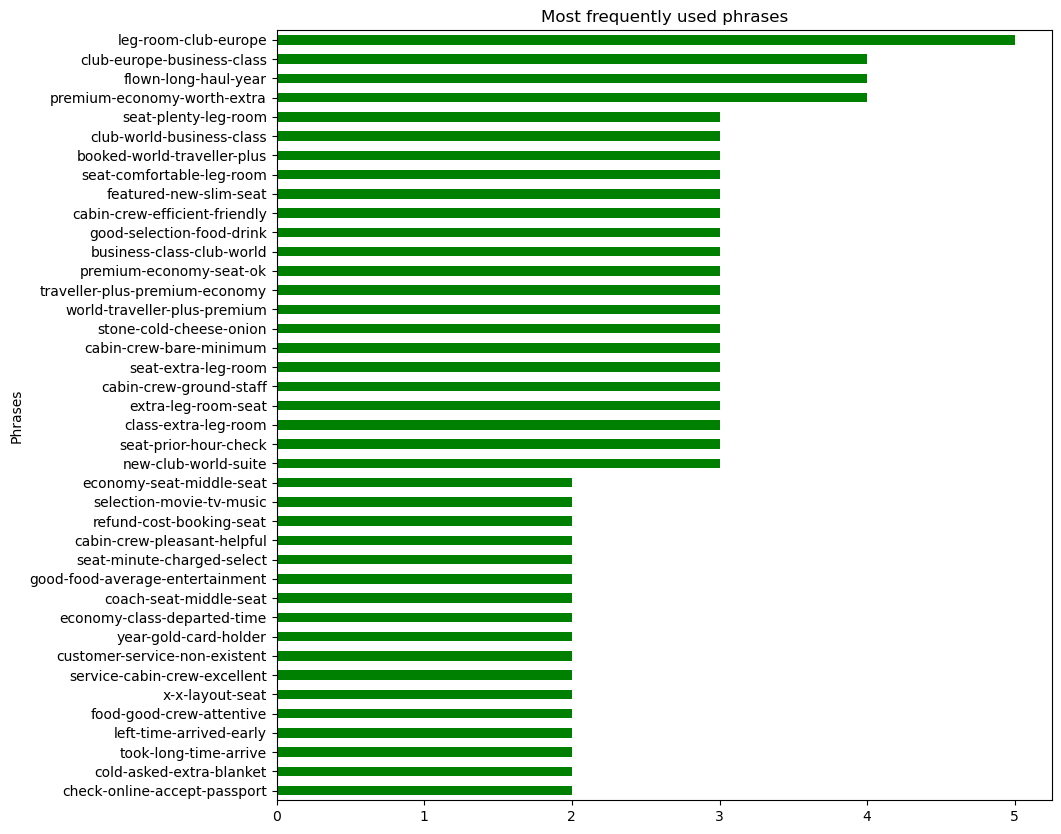

In [48]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")

new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10, 4);

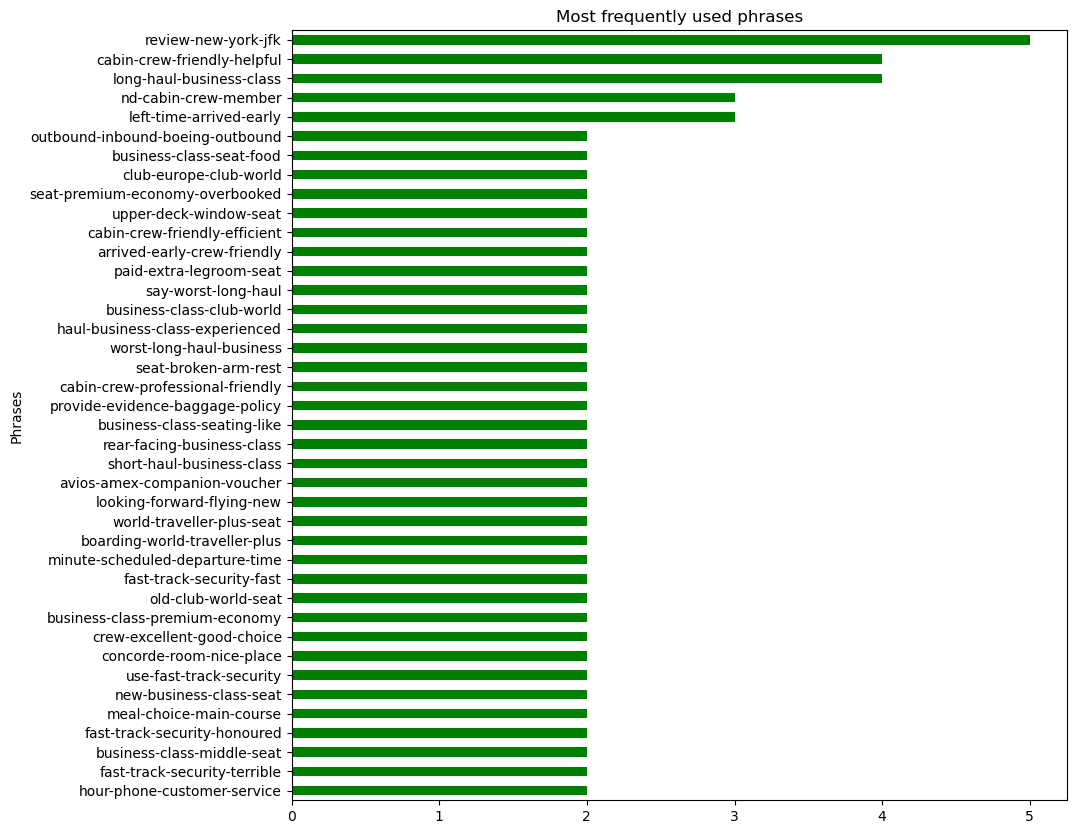

In [49]:
new_words_4_6 = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words_4_6, 4);

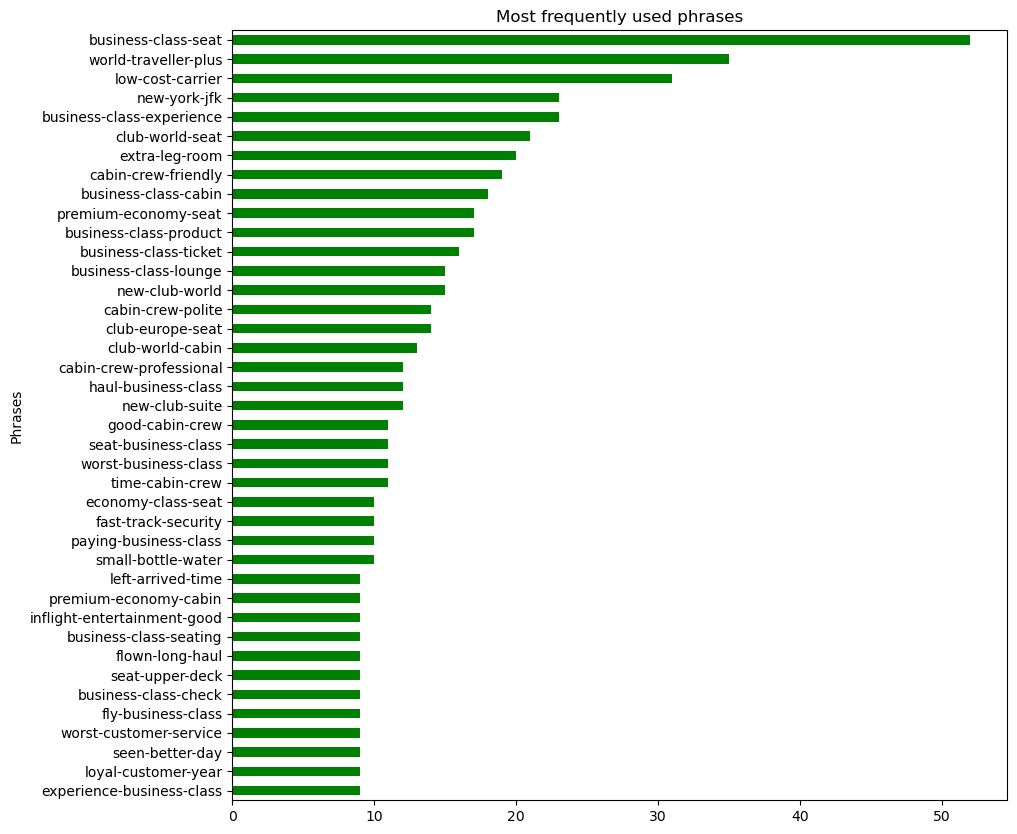

In [50]:
new_words_1_3 = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words_1_3, 3);

In [51]:
%%capture

from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

df['polarity'] = 0

for i in range(len(df.corpus)):
  sent = TextBlob(df.corpus[i])
  polarity = sent.sentiment.polarity
  subjectivity = sent.sentiment.subjectivity
  df['polarity'][i] = polarity

In [52]:
print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

2599 number of reviews between -0.2 and 0.2 polarity score
1506 number of reviews between -0.1 and 0.1 polarity score


/var/folders/hw/305q3bh121v7bzbxgzxk2_8r0000gn/T/ipykernel_65829/832743021.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/Users/rakibulhasan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



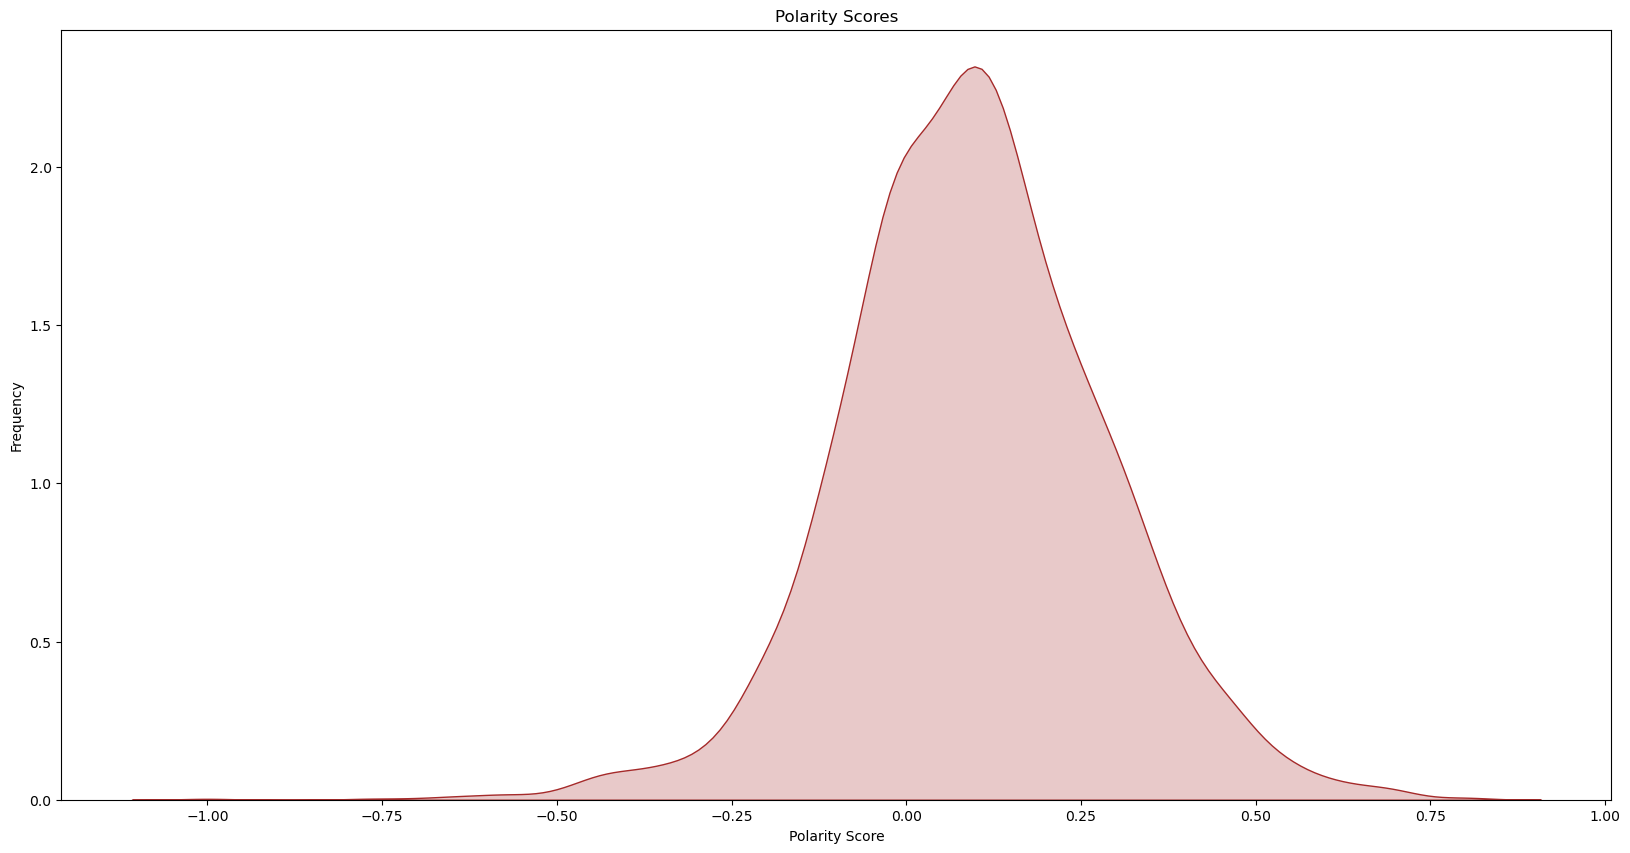

In [53]:
fig, ax = plt.subplots(figsize=(20, 10))
ax2 = sns.kdeplot(df['polarity'], shade=True, color='brown')

ax2.set_xlabel("Polarity Score")
ax2.set_ylabel("Frequency")
ax2.set_title("Polarity Scores");


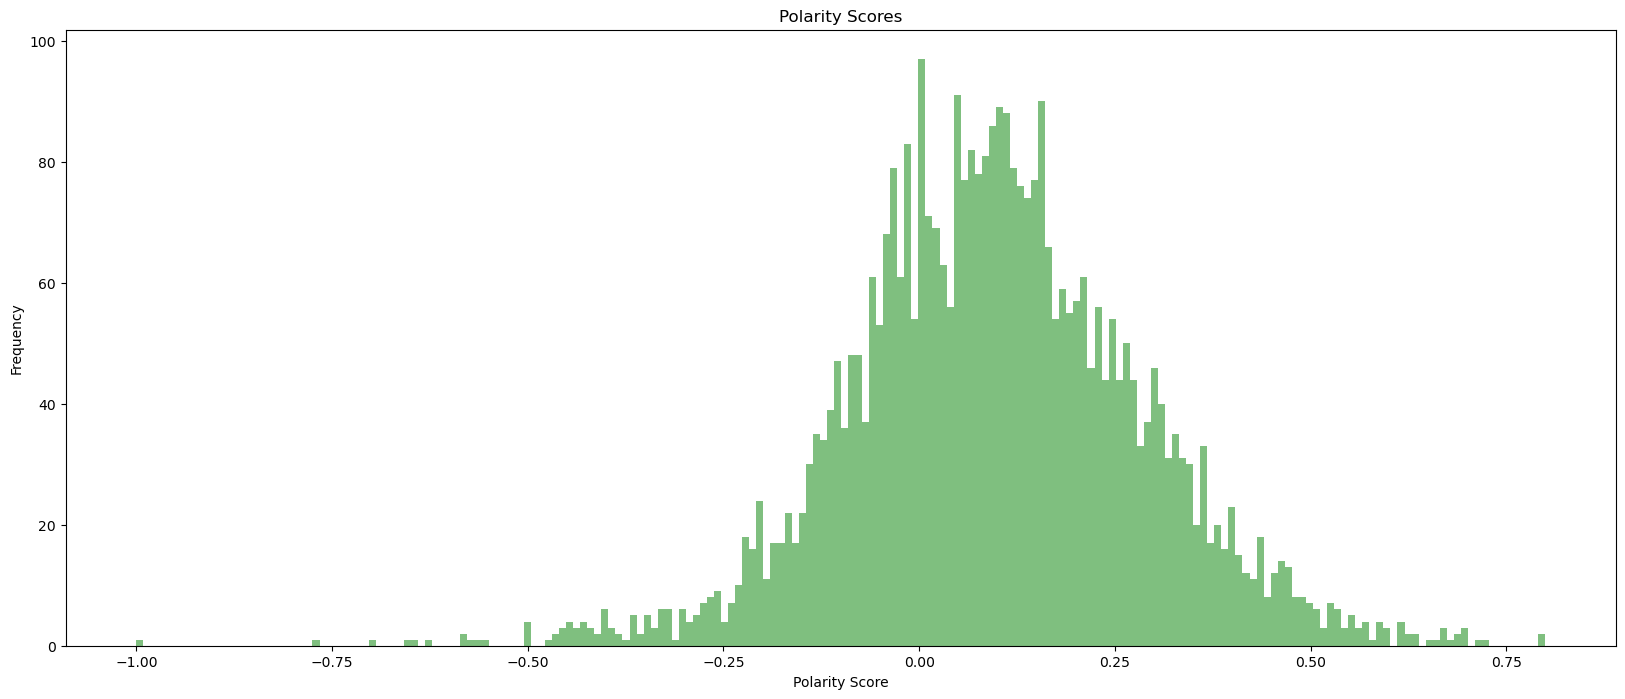

In [54]:
df.polarity.plot.hist(bins=200, figsize=(20,8), fill=True, color='green', alpha=0.5, xlabel='Polarity Score', ylabel='Frequency', title='Polarity Scores');

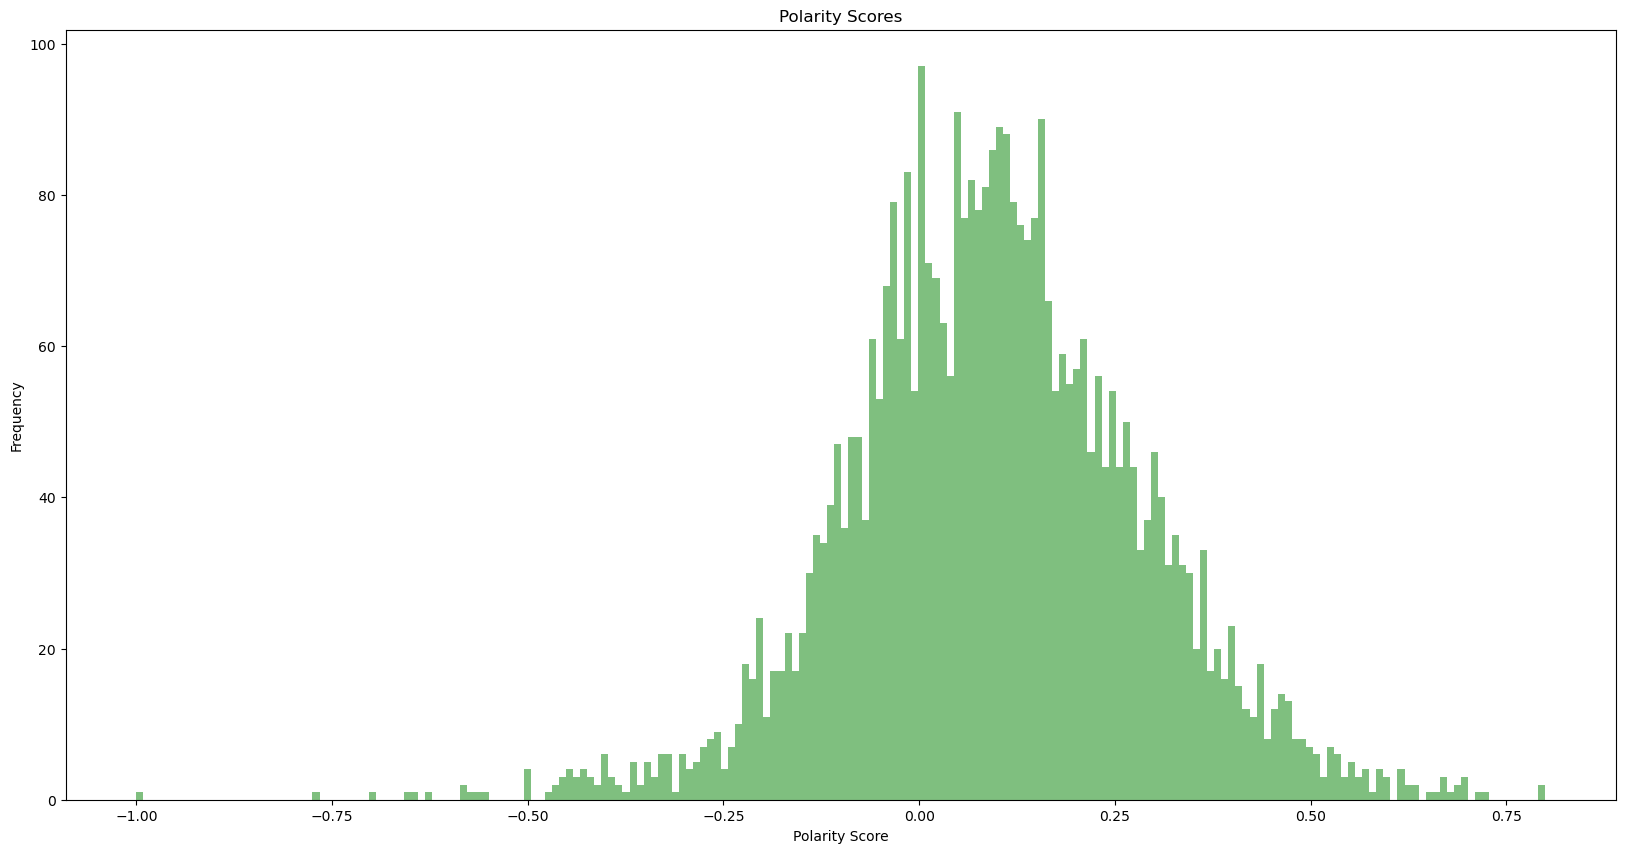

In [55]:
plt.figure(figsize=(20,10))
plt.hist(df.polarity, bins=200, color='green', alpha=0.5)
plt.xlabel("Polarity Score")
plt.ylabel("Frequency")
plt.title("Polarity Scores");

In [56]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rakibulhasan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [57]:
%%capture

import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

vds = SentimentIntensityAnalyzer()

df['label'] = 0

for i in range(len(df.corpus)):
  score = vds.polarity_scores(df.corpus[i])['compound']

  if score > 0.5:
    df['label'][i] = "Positive"
  elif score < 0:
    df['label'][i] = "Negative"
  else:
    df['label'][i] = "Neutral"

In [58]:
df.label.value_counts()

label
Positive    2174
Negative    1263
Neutral      397
Name: count, dtype: int64

In [59]:
print(df.shape)
print(df.dtypes)

(3834, 8)
reviews             object
stars              float64
date        datetime64[ns]
country             object
verified              bool
corpus              object
polarity           float64
label               object
dtype: object


In [60]:
df

reviews  stars       date  \
0     Not Verified |  The customer service is one of...    5.0 2024-08-18   
1     Not Verified | Before my flight, I was forced ...    2.0 2024-08-15   
2     ✅ Trip Verified |   British Airways at its bes...    1.0 2024-08-12   
3     ✅ Trip Verified | An excellent flight! Despite...    8.0 2024-08-12   
4     ✅ Trip Verified | I recently traveled with Bri...    8.0 2024-08-11   
...                                                 ...    ...        ...   
3829  YYZ to LHR - July 2012 - I flew overnight in p...    9.0 2012-08-29   
3830  LHR to HAM. Purser addresses all club passenge...    5.0 2012-08-28   
3831  My son who had worked for British Airways urge...    8.0 2011-10-12   
3832  London City-New York JFK via Shannon on A318 b...    2.0 2011-10-11   
3833  SIN-LHR BA12 B747-436 First Class. Old aircraf...    7.0 2011-10-09   

             country  verified  \
0      United States     False   
1     United Kingdom     False   
2     United Kingdom      True   
3            Lebanon      True   
4      United States      True   
...              ...       ...   
3829          Canada     False   
3830  United Kingdom     False   
3831  United Kingdom     False   
3832   United States     False   
3833  United Kingdom     False   

                                                 corpus  polarity     label  
0     verified customer service one worst ever seen ...  0.025874  Negative  
1     verified flight forced ground staff check new ... -0.143357  Negative  
2     british airway best outstanding service flight...  0.500833  Positive  
3     excellent flight despite hour flight configure...  0.309812  Positive  
4     recently traveled british airway mixed experie... -0.049405  Negative  
...                                                 ...       ...       ...  
3829  yyz lhr july flew overnight premium economy ch...  0.310000  Positive  
3830  lhr ham purser address club passenger name boa...  0.173214  Positive  
3831  son worked british airway urged fly british ai...  0.113542  Positive  
3832  london city new york jfk via shannon really ni...  0.306061  Positive  
3833  sin lhr ba b first class old aircraft seat pri... -0.003221  Negative  

[3834 rows x 8 columns]

In [61]:
vader_counts = df.label.value_counts()
vader_counts

label
Positive    2174
Negative    1263
Neutral      397
Name: count, dtype: int64

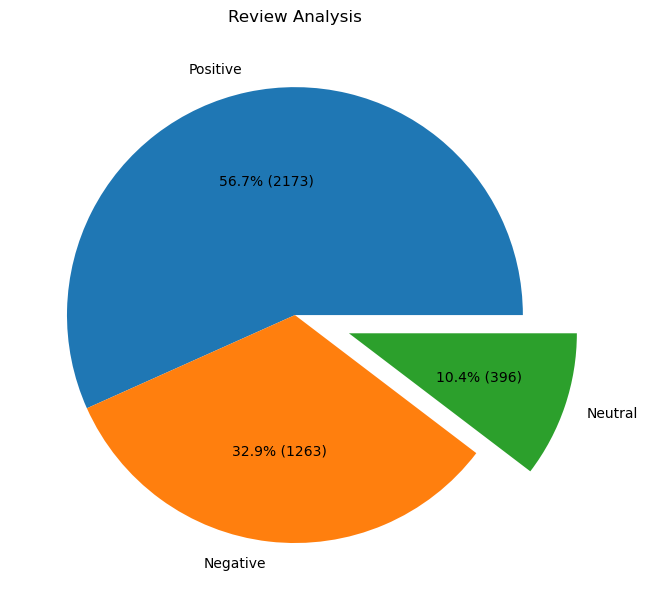

In [62]:
plt.figure(figsize=(25,25))

plt.subplot(1,3,2)
plt.title("Review Analysis")
plt.pie(vader_counts, labels = vader_counts.index, explode=(0, 0, 0.25), autopct=lambda pct:'{:.1f}% ({:d})'.format(pct, int(pct/100.*np.sum(vader_counts))), shadow=False);

In [63]:
print(df.shape)
df

(3834, 8)


reviews  stars       date  \
0     Not Verified |  The customer service is one of...    5.0 2024-08-18   
1     Not Verified | Before my flight, I was forced ...    2.0 2024-08-15   
2     ✅ Trip Verified |   British Airways at its bes...    1.0 2024-08-12   
3     ✅ Trip Verified | An excellent flight! Despite...    8.0 2024-08-12   
4     ✅ Trip Verified | I recently traveled with Bri...    8.0 2024-08-11   
...                                                 ...    ...        ...   
3829  YYZ to LHR - July 2012 - I flew overnight in p...    9.0 2012-08-29   
3830  LHR to HAM. Purser addresses all club passenge...    5.0 2012-08-28   
3831  My son who had worked for British Airways urge...    8.0 2011-10-12   
3832  London City-New York JFK via Shannon on A318 b...    2.0 2011-10-11   
3833  SIN-LHR BA12 B747-436 First Class. Old aircraf...    7.0 2011-10-09   

             country  verified  \
0      United States     False   
1     United Kingdom     False   
2     United Kingdom      True   
3            Lebanon      True   
4      United States      True   
...              ...       ...   
3829          Canada     False   
3830  United Kingdom     False   
3831  United Kingdom     False   
3832   United States     False   
3833  United Kingdom     False   

                                                 corpus  polarity     label  
0     verified customer service one worst ever seen ...  0.025874  Negative  
1     verified flight forced ground staff check new ... -0.143357  Negative  
2     british airway best outstanding service flight...  0.500833  Positive  
3     excellent flight despite hour flight configure...  0.309812  Positive  
4     recently traveled british airway mixed experie... -0.049405  Negative  
...                                                 ...       ...       ...  
3829  yyz lhr july flew overnight premium economy ch...  0.310000  Positive  
3830  lhr ham purser address club passenger name boa...  0.173214  Positive  
3831  son worked british airway urged fly british ai...  0.113542  Positive  
3832  london city new york jfk via shannon really ni...  0.306061  Positive  
3833  sin lhr ba b first class old aircraft seat pri... -0.003221  Negative  

[3834 rows x 8 columns]

In [64]:
# prompt: Using dataframe df: I want to add a column to the DataFrame where if the star rating is more than 6 then it is recommended and if it is less than 6 it is not recommended, while 6 means neutral

def recommend(stars):
    if stars > 6:
        return "Recommended"
    elif stars < 6:
        return "Not Recommended"
    else:
        return "Neutral"

# Apply the function to the 'stars' column and create a new column 'recommendation'
df['recommendation'] = df['stars'].apply(recommend)


In [65]:
df.dtypes

reviews                   object
stars                    float64
date              datetime64[ns]
country                   object
verified                    bool
corpus                    object
polarity                 float64
label                     object
recommendation            object
dtype: object

In [66]:
recommendation_counts = df.recommendation.value_counts()
recommendation_counts

recommendation
Not Recommended    2297
Recommended        1339
Neutral             198
Name: count, dtype: int64

In [67]:
df.head()

reviews  stars       date  \
0  Not Verified |  The customer service is one of...    5.0 2024-08-18   
1  Not Verified | Before my flight, I was forced ...    2.0 2024-08-15   
2  ✅ Trip Verified |   British Airways at its bes...    1.0 2024-08-12   
3  ✅ Trip Verified | An excellent flight! Despite...    8.0 2024-08-12   
4  ✅ Trip Verified | I recently traveled with Bri...    8.0 2024-08-11   

          country  verified  \
0   United States     False   
1  United Kingdom     False   
2  United Kingdom      True   
3         Lebanon      True   
4   United States      True   

                                              corpus  polarity     label  \
0  verified customer service one worst ever seen ...  0.025874  Negative   
1  verified flight forced ground staff check new ... -0.143357  Negative   
2  british airway best outstanding service flight...  0.500833  Positive   
3  excellent flight despite hour flight configure...  0.309812  Positive   
4  recently traveled british airway mixed experie... -0.049405  Negative   

    recommendation  
0  Not Recommended  
1  Not Recommended  
2  Not Recommended  
3      Recommended  
4      Recommended

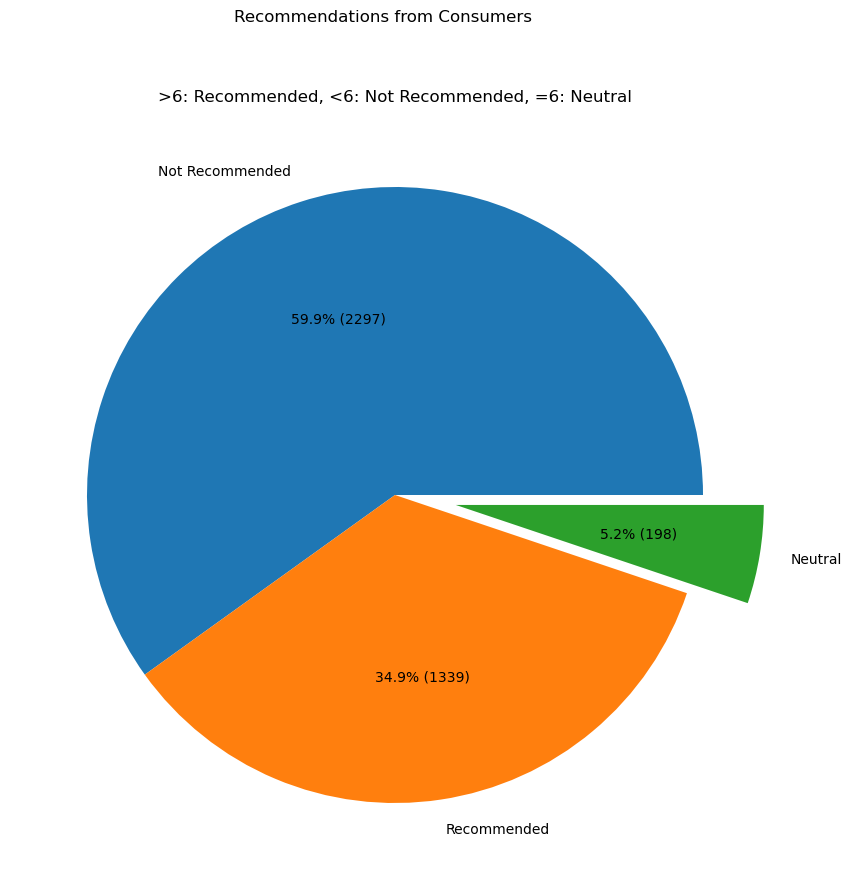

In [68]:
plt.figure(figsize=(10,10))

plt.suptitle("Recommendations from Consumers")
plt.title(">6: Recommended, <6: Not Recommended, =6: Neutral")
plt.pie(recommendation_counts, labels = recommendation_counts.index, explode=(0, 0, 0.2), autopct=lambda pct:'{:.1f}% ({:d})'.format(pct, int(pct/100.*np.sum(recommendation_counts))), shadow=False);

In [69]:
df_uk = df[df['country'] == 'United Kingdom']
df_uk

reviews  stars       date  \
1     Not Verified | Before my flight, I was forced ...    2.0 2024-08-15   
2     ✅ Trip Verified |   British Airways at its bes...    1.0 2024-08-12   
5     ✅ Trip Verified |   My family and I were booke...    3.0 2024-08-09   
9     ✅ Trip Verified |   Crew were amazing and atte...    8.0 2024-08-07   
13    ✅ Trip Verified | Flight cancelled due to bad ...    1.0 2024-08-02   
...                                                 ...    ...        ...   
3827  LHR-JFK-LAX-LHR. Check in was ok apart from be...    1.0 2012-08-29   
3828  HKG-LHR in New Club World on Boeing 777-300 - ...    3.0 2012-08-29   
3830  LHR to HAM. Purser addresses all club passenge...    5.0 2012-08-28   
3831  My son who had worked for British Airways urge...    8.0 2011-10-12   
3833  SIN-LHR BA12 B747-436 First Class. Old aircraf...    7.0 2011-10-09   

             country  verified  \
1     United Kingdom     False   
2     United Kingdom      True   
5     United Kingdom      True   
9     United Kingdom      True   
13    United Kingdom      True   
...              ...       ...   
3827  United Kingdom     False   
3828  United Kingdom     False   
3830  United Kingdom     False   
3831  United Kingdom     False   
3833  United Kingdom     False   

                                                 corpus  polarity     label  \
1     verified flight forced ground staff check new ... -0.143357  Negative   
2     british airway best outstanding service flight...  0.500833  Positive   
5     family booked leave london hong kong august ma... -0.187500  Negative   
9     crew amazing attentive nothing missed definite...  0.333333  Positive   
13    flight cancelled due bad weather ba contacted ... -0.006250   Neutral   
...                                                 ...       ...       ...   
3827  lhr jfk lax lhr check ok apart snapped early c...  0.029333  Positive   
3828  hkg lhr new club world boeing bought ticket wt...  0.162788  Positive   
3830  lhr ham purser address club passenger name boa...  0.173214  Positive   
3831  son worked british airway urged fly british ai...  0.113542  Positive   
3833  sin lhr ba b first class old aircraft seat pri... -0.003221  Negative   

       recommendation  
1     Not Recommended  
2     Not Recommended  
5     Not Recommended  
9         Recommended  
13    Not Recommended  
...               ...  
3827  Not Recommended  
3828  Not Recommended  
3830  Not Recommended  
3831      Recommended  
3833      Recommended  

[2400 rows x 9 columns]

In [70]:
df_uk.reset_index(drop=True, inplace=True)

In [71]:
df_uk

reviews  stars       date  \
0     Not Verified | Before my flight, I was forced ...    2.0 2024-08-15   
1     ✅ Trip Verified |   British Airways at its bes...    1.0 2024-08-12   
2     ✅ Trip Verified |   My family and I were booke...    3.0 2024-08-09   
3     ✅ Trip Verified |   Crew were amazing and atte...    8.0 2024-08-07   
4     ✅ Trip Verified | Flight cancelled due to bad ...    1.0 2024-08-02   
...                                                 ...    ...        ...   
2395  LHR-JFK-LAX-LHR. Check in was ok apart from be...    1.0 2012-08-29   
2396  HKG-LHR in New Club World on Boeing 777-300 - ...    3.0 2012-08-29   
2397  LHR to HAM. Purser addresses all club passenge...    5.0 2012-08-28   
2398  My son who had worked for British Airways urge...    8.0 2011-10-12   
2399  SIN-LHR BA12 B747-436 First Class. Old aircraf...    7.0 2011-10-09   

             country  verified  \
0     United Kingdom     False   
1     United Kingdom      True   
2     United Kingdom      True   
3     United Kingdom      True   
4     United Kingdom      True   
...              ...       ...   
2395  United Kingdom     False   
2396  United Kingdom     False   
2397  United Kingdom     False   
2398  United Kingdom     False   
2399  United Kingdom     False   

                                                 corpus  polarity     label  \
0     verified flight forced ground staff check new ... -0.143357  Negative   
1     british airway best outstanding service flight...  0.500833  Positive   
2     family booked leave london hong kong august ma... -0.187500  Negative   
3     crew amazing attentive nothing missed definite...  0.333333  Positive   
4     flight cancelled due bad weather ba contacted ... -0.006250   Neutral   
...                                                 ...       ...       ...   
2395  lhr jfk lax lhr check ok apart snapped early c...  0.029333  Positive   
2396  hkg lhr new club world boeing bought ticket wt...  0.162788  Positive   
2397  lhr ham purser address club passenger name boa...  0.173214  Positive   
2398  son worked british airway urged fly british ai...  0.113542  Positive   
2399  sin lhr ba b first class old aircraft seat pri... -0.003221  Negative   

       recommendation  
0     Not Recommended  
1     Not Recommended  
2     Not Recommended  
3         Recommended  
4     Not Recommended  
...               ...  
2395  Not Recommended  
2396  Not Recommended  
2397  Not Recommended  
2398      Recommended  
2399      Recommended  

[2400 rows x 9 columns]

In [72]:
vader_uk=df_uk.label.value_counts()
recommendation_uk=df_uk.recommendation.value_counts()
print(vader_uk)
print(recommendation_uk)

label
Positive    1383
Negative     763
Neutral      254
Name: count, dtype: int64
recommendation
Not Recommended    1414
Recommended         856
Neutral             130
Name: count, dtype: int64


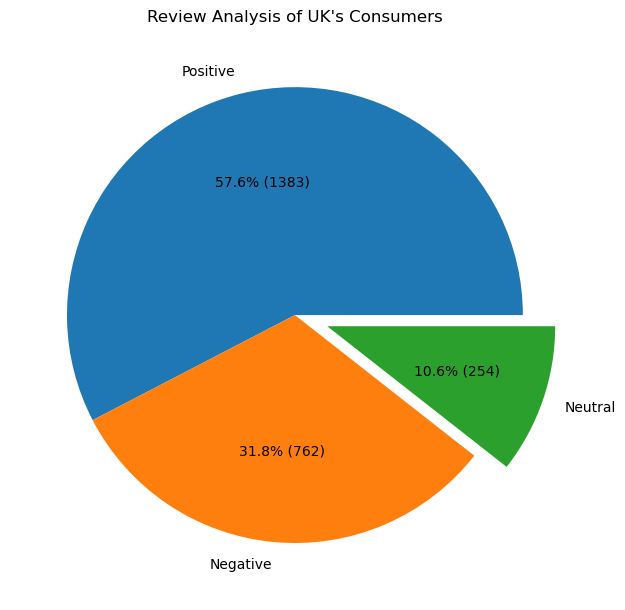

In [73]:
plt.figure(figsize=(25,25))

plt.subplot(1,3,2)
plt.title("Review Analysis of UK's Consumers")
plt.pie(vader_uk, labels = vader_uk.index, explode=(0, 0, 0.15), autopct=lambda pct:'{:.1f}% ({:d})'.format(pct, int(pct/100.*np.sum(vader_uk))), shadow=False);

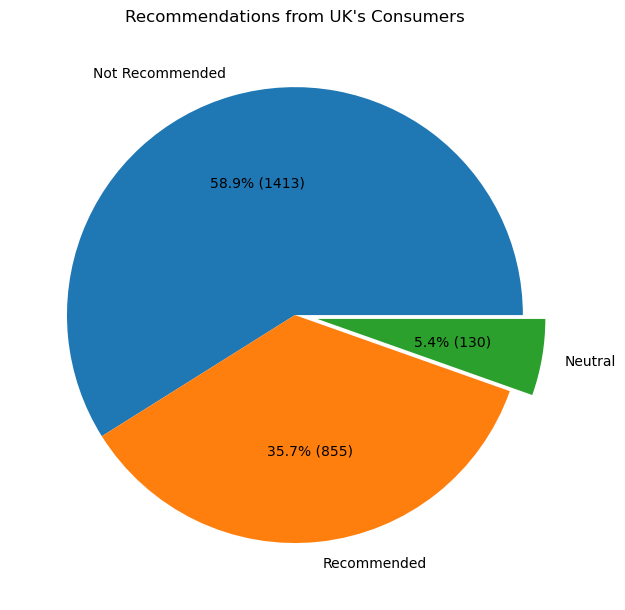

In [74]:
plt.figure(figsize=(25,25))

plt.subplot(1,3,2)
plt.title("Recommendations from UK's Consumers")
plt.pie(recommendation_uk, labels = recommendation_uk.index, explode=(0,0,0.1), autopct=lambda pct:'{:.1f}% ({:d})'.format(pct, int(pct/100.*np.sum(recommendation_uk))), shadow=False);

In [76]:
df.to_csv('Final Dataset/Analysed_BA_reviews.csv')
df_uk.to_csv('Final Dataset/UK_BA_reviews.csv')
df_country_rating.to_csv('Final Dataset/Country_Ratings.csv')
df_country_review.to_csv('Final Dataset/Country_Reviews.csv')
df_ratings.to_csv('Final Dataset/Ratings.csv')
df_year.to_csv('Final Dataset/Ratings PerYear.csv')